# Visualizing the Effects of Cholesterol and Blood Pressure on Heart Disease

*Mikel Ibarra Gallardo, Akshat Karla, Caitlin Lichimo, JunYuan Liu*

## Introduction

   Heart disease is a major global cause of death that takes millions of lives per year. According to the CDC, there is one death in the US every 34 seconds due to heart disease. Not only is this unfortunate for those ⅕ people who suffer this demise, but it also costs billions of dollars in health care services. Heart disease data sets such as this one can be useful to predict factors that make certain demographics of people more susceptible for suffering from a heart disease, thus allowing the development of mitigation strategies.

## Question: 

Are cholesterol and/or blood pressure good indicators of heart disease?

## Preliminary Exploratory Data Analysis:

We will be using the Heart Disease Data Set provided by UC Irvine. This data set describes heart condition information based on 303 individuals from different regions. This data is divided into 4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach, however we will only be utilizinng the Cleaveland data. The data set contains 76 attributes, but so far only 14 have been cited in literature:

- Age: age in years
- Sex: sex (1 = male; 0 = female)
- Cp: chest pain type (value 1 = typical angina, value 2 = atypical angina, value 3 = non-anginal pain, value 4 = asymptomatic)
- Trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- Chol: serum cholesterol in mg/dl
- Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- Restecg: resting electrocardiographic results (value 0 = normal, value 1 = having ST-T wave abnormality, value 2 = showing probably or definite left ventricular hypertrophy by Estes’ criteria
- Thalach: maximum heart rate achieved
- Exang: exercise induced angina (1 = yes; 0 = no)
- Oldpeak: ST depression induced by exercise relative to rest
- Slope: the slope of the peak exercise ST segment (value 1 = upsloping, value 2 = flat, value 3 = downsloping)
- Ca: number of major vessels (0-3) colored by fluoroscopy
- Thal: 3 = normal, 6 = fixed defect, 7 = reversible defect
- Num: diagnosis of heart disease (angiographic disease status) (value 0 = <50% diameter narrowing, value 1 = > 50% diameter narrowing)

For this project, we will be using the processed data from Cleaveland.

## Method

To start our preliminary analysis, we loaded the Heart Disease dataset from the original source on the web using

In [2]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
df_cleveland <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                           ",", col_names = c("Age","Sex", "p","Trestbps", "Chol", "Fbs", "Restecg", "Thalach", "Exang",
                                              "Oldpeak", "Slope", "Ca", "Thal", "Num"))
df_cleveland[df_cleveland == "?"] <- NA
df_cleveland <- mutate(df_cleveland, Num2 = Num/Num)
df_cleveland[df_cleveland == "NaN"] <- 0
df_cleveland <- df_cleveland |> 
        mutate("Location" = "Cleveland")
df_cleveland <- df_cleveland |>
                    mutate(Num2 = as.factor(Num2))

df_cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Ca, Thal
dbl (12): Age, Sex, p, Trestbps, Chol, Fbs, Restecg, Thalach, Exang, Oldpeak...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,p,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num,Num2,Location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1,Cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0,Cleveland
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0,Cleveland
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,0,Cleveland
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,1,Cleveland
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,0,Cleveland
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,1,Cleveland


In [ ]:
BP_vs_Age_plot <- df_cleveland |>
    ggplot(aes(x=Age,y=Trestbps, color=factor(Num2))) + 
        geom_point() +
        labs(x = "Age",y = "Blood Pressure", color = "Diagnosis of Heart Disease")
BP_vs_Age_plot

In [ ]:
Chol_vs_Age_plot <- df_cleveland |>
    ggplot(aes(x=Age,y=Chol, color=factor(Num2))) + 
        geom_point() +
        labs(x = "Age",y = "Chol", color = "Diagnosis of Heart Disease")
Chol_vs_Age_plot

In [ ]:
BP_vs_Chol_plot <- df_cleveland |>
    ggplot(aes(x=Chol,y=Trestbps, color=factor(Num2))) + 
        geom_point() +
        labs(x = "Chol",y = "Blood Pressure", color = "Diagnosis of Heart Disease")
BP_vs_Chol_plot

In [4]:
cleveland_split <- initial_split(df_cleveland, prop = 0.75, strata = Num2)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

In [13]:
set.seed(1)

cleveland_recipe <- recipe(Num2 ~ Age + Trestbps, data = cleveland_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

cleveland_vfold <- vfold_cv(cleveland_train, v = 5, strata = Num2)
gridvals <- tibble(neighbors = seq(1, 25))

cleveland_results <- workflow() |>
  add_recipe(cleveland_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = cleveland_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

cleveland_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5368994,5,0.03065410,Preprocessor1_Model01
2,accuracy,binary,0.5236583,5,0.03213992,Preprocessor1_Model02
3,accuracy,binary,0.5330435,5,0.02206709,Preprocessor1_Model03
4,accuracy,binary,0.5421344,5,0.02368925,Preprocessor1_Model04
5,accuracy,binary,0.6080413,5,0.02893603,Preprocessor1_Model05
6,accuracy,binary,0.5990514,5,0.02219381,Preprocessor1_Model06
7,accuracy,binary,0.5899605,5,0.03293645,Preprocessor1_Model07
8,accuracy,binary,0.5986561,5,0.02939064,Preprocessor1_Model08
9,accuracy,binary,0.5989504,5,0.02272520,Preprocessor1_Model09


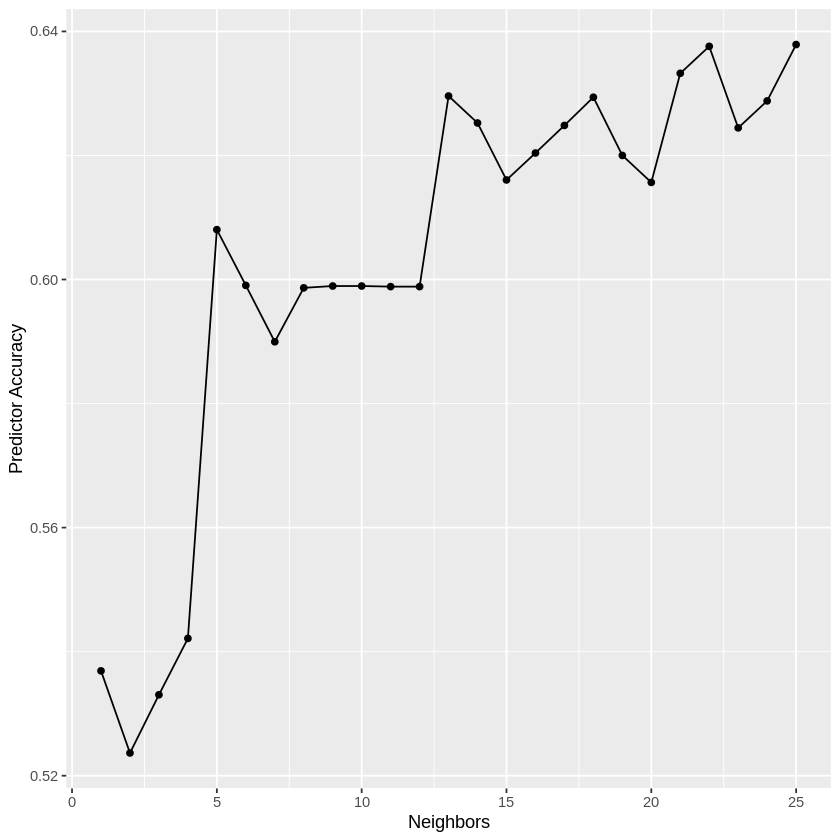

In [15]:
cleveland_bps_knn_plot <- cleveland_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    geom_point() +
    labs(x = "Neighbors", y = "Predictor Accuracy")

cleveland_bps_knn_plot

Read csv file online from github, then we store the database in a variable ?. 
We no

Read the database online and clean the database, etc…..

 

Since our goal is indicating the heart disease based on other observation and whether or not one gets  heart disease is a binary question, we choose to use classification on R to solve this problem.

 

We split the database into two part, the training set and testing set. Training set is used to train the model and testing set is used to test the accuracy of the model. Cross-validation is applied to the training set in order to find the best k-value we shall use into train the model.

 

As the RMSD (?) vs k-value shown, RMSD gets to minimum when k=?. Therefore, we pick k=? in training the model.

 

After the model is trained by training data set, we test the accuracy of the model by testing data set. Note: after running the testing set, we could not go back to the training set and train the model once more since it’s already exposed to the testing set.

## References

Centers for Disease Control and Prevention. (2022, October 14). Heart disease facts. Centers for Disease Control and Prevention. Retrieved October 24, 2022, from https://www.cdc.gov/heartdisease/facts.htm#:~:text=Heart%20disease%20is%20the%20leading,groups%20in%20the%20United%20States.&text=One%20person%20dies%20every%2034,United%20States%20from%20cardiovascular%20disease.&text=About%20697%2C000%20people%20in%20the,1%20in%20every%205%20deaths.

UCI Machine Learning Repository: Heart disease data set. (n.d.). Retrieved October 28, 2022, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease